# Imports
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

# Loading and visualizing data
***

In [2]:
header_list = ["spec_name", "impl_name", "set_size", "edge_prob", "policy_size", "spec_len", "rego_lines_of_code", "error_rate", "edge_number", "comp_cum_time", "result"]
df = pd.read_csv("equivalence.dat", sep=';', usecols=[0,1,2,3,4,5,6,7,8,9,10], names=header_list)

chunks = pd.read_csv("equivalence.dat", sep=';', usecols=[0,1,2,3,4,5,6,7,8,9,10], names=header_list, chunksize=50000)
slim_data = []
for chunk in chunks:
    chunk["comp_cum_time"] *= 1000
    slim_data.append(chunk)
df = pd.concat(slim_data)

# Seconds to Milliseconds
#df["comp_cum_time"] *= 1000

df

,spec_name,impl_name,set_size,edge_prob,policy_size,spec_len,rego_lines_of_code,error_rate,edge_number,comp_cum_time,result
0,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.188,True
1,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.189,True
2,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.283,True
3,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.125,True
4,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.117,True
...,...,...,...,...,...,...,...,...,...,...,...
1079995,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,7.668,False
1079996,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.697,False
1079997,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.238,False
1079998,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,61.615,False


# Removing outliers and harmonizing sample size
***

In [3]:
# All values of predictors
set_sizes = sorted(df.set_size.unique())
policy_sizes = sorted(df.policy_size.unique())
error_rates = sorted(df.error_rate.unique())


# Removing 0.7 error rates values from data
#error_rates = error_rates[:-1]


print("Used values:")
print("Set sizes: {}".format(set_sizes))
print("Policy sizes: {}".format(policy_sizes))
print("Error rates: {}".format(error_rates))
print("")


# Making list of DFs by predictors
preds_df_list = []
labels = []
for set_size in set_sizes:
    for policy_size in policy_sizes:
        for error_rate in error_rates:
            print("DF parameters: {} {} {}".format(set_size, policy_size, error_rate))
            labels.append("{} {} {}".format(set_size, policy_size, error_rate))
            preds_df_list.append(df[(df.set_size == set_size) & (df.policy_size == policy_size) & (df.error_rate == error_rate)])
print("\n")


print("Unmodified DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
print("\n")


# Removing outliers in DFs
#new_preds_df_list = []
#for pred_df in preds_df_list: # Remove all values with Z-score > 3
#    new_preds_df_list.append( pred_df[np.abs(pred_df.comp_cum_time-pred_df.comp_cum_time.mean()) <= (3*pred_df.comp_cum_time.std())] )
#preds_df_list = new_preds_df_list


# Print DF shapes to check sample sizes, put them in list
preds_df_list_sample_sizes = []
print("No outliers DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
    preds_df_list_sample_sizes.append(pred_df.shape[0])
print("\n")

minimum_sample_size = min(preds_df_list_sample_sizes)
print("Minimum common sample size: {}".format(minimum_sample_size))

# Make sample sizes equal
new_preds_df_list = []
for pred_df in preds_df_list:
    new_preds_df_list.append(pred_df.head(minimum_sample_size))
preds_df_list = new_preds_df_list


# Check new DF shapes
print("Modified DF shapes")
for pred_df in preds_df_list:
    print(pred_df.shape)
print("\n")

Used values:
Set sizes: [10, 20, 30, 50, 100]
Policy sizes: [1, 2]
Error rates: [0.0, 0.2, 0.4, 0.7]

DF parameters: 10 1 0.0
DF parameters: 10 1 0.2
DF parameters: 10 1 0.4
DF parameters: 10 1 0.7
DF parameters: 10 2 0.0
DF parameters: 10 2 0.2
DF parameters: 10 2 0.4
DF parameters: 10 2 0.7
DF parameters: 20 1 0.0
DF parameters: 20 1 0.2
DF parameters: 20 1 0.4
DF parameters: 20 1 0.7
DF parameters: 20 2 0.0
DF parameters: 20 2 0.2
DF parameters: 20 2 0.4
DF parameters: 20 2 0.7
DF parameters: 30 1 0.0
DF parameters: 30 1 0.2
DF parameters: 30 1 0.4
DF parameters: 30 1 0.7
DF parameters: 30 2 0.0
DF parameters: 30 2 0.2
DF parameters: 30 2 0.4
DF parameters: 30 2 0.7
DF parameters: 50 1 0.0
DF parameters: 50 1 0.2
DF parameters: 50 1 0.4
DF parameters: 50 1 0.7
DF parameters: 50 2 0.0
DF parameters: 50 2 0.2
DF parameters: 50 2 0.4
DF parameters: 50 2 0.7
DF parameters: 100 1 0.0
DF parameters: 100 1 0.2
DF parameters: 100 1 0.4
DF parameters: 100 1 0.7
DF parameters: 100 2 0.0
DF pa

# Merge all data back together
***

In [4]:
merged_df = pd.DataFrame()
for pred_df in preds_df_list:
    merged_df = merged_df.append(pred_df)

df = merged_df

df

,spec_name,impl_name,set_size,edge_prob,policy_size,spec_len,rego_lines_of_code,error_rate,edge_number,comp_cum_time,result
0,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.188,True
1,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.189,True
2,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.283,True
3,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.125,True
4,workflow-specs/randomly-generated/10-set-1-0-e...,impl-metagraph-generators/generated-from-rando...,10,1.0,1,24,332,0.0,35,0.117,True
...,...,...,...,...,...,...,...,...,...,...,...
1079995,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,7.668,False
1079996,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.697,False
1079997,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,8.238,False
1079998,workflow-specs/randomly-generated/100-set-1-0-...,impl-metagraph-generators/generated-from-rando...,100,1.0,2,250,23781,0.7,614,61.615,False


In [5]:
spec_names = sorted(df.spec_name.unique())
print(spec_names)
print("\n")
impl_names = sorted(df.impl_name.unique())

['workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/1.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/10.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/11.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/12.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/13.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/14.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/15.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/16.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/17.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/18.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/19.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/2.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/20.dat', 'workflow-specs/randomly-generated/10-set-1-0-edges-1-policy/21.dat', 'workflow-specs/rando

In [15]:
# Making list of DFs by spec_name
impl_name_df_list = []
for impl_name in impl_names[-120:]:
    impl_name_df_list.append(df[(df.impl_name == impl_name)])
print("\n")
impl_name_df_list

[                                                spec_name  \
 852300  workflow-specs/randomly-generated/50-set-1-0-e...   
 852301  workflow-specs/randomly-generated/50-set-1-0-e...   
 852302  workflow-specs/randomly-generated/50-set-1-0-e...   
 852303  workflow-specs/randomly-generated/50-set-1-0-e...   
 852304  workflow-specs/randomly-generated/50-set-1-0-e...   
 852305  workflow-specs/randomly-generated/50-set-1-0-e...   
 852306  workflow-specs/randomly-generated/50-set-1-0-e...   
 852307  workflow-specs/randomly-generated/50-set-1-0-e...   
 852308  workflow-specs/randomly-generated/50-set-1-0-e...   
 852309  workflow-specs/randomly-generated/50-set-1-0-e...   
 852310  workflow-specs/randomly-generated/50-set-1-0-e...   
 852311  workflow-specs/randomly-generated/50-set-1-0-e...   
 852312  workflow-specs/randomly-generated/50-set-1-0-e...   
 852313  workflow-specs/randomly-generated/50-set-1-0-e...   
 852314  workflow-specs/randomly-generated/50-set-1-0-e...   
 852315 

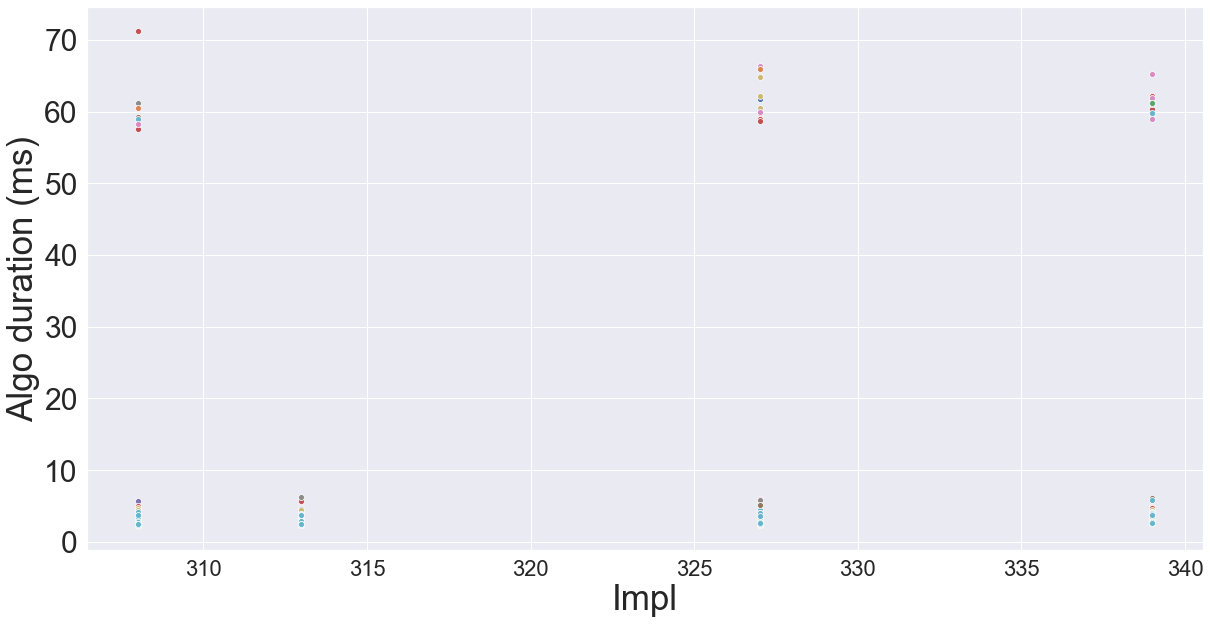

In [20]:
# Scatter plot
for impl_df in impl_name_df_list:
    sns.scatterplot(data=impl_df, x="edge_number", y="comp_cum_time")
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=30)
    plt.xlabel("Impl", fontsize=35)
    plt.ylabel("Algo duration (ms)", fontsize=35)

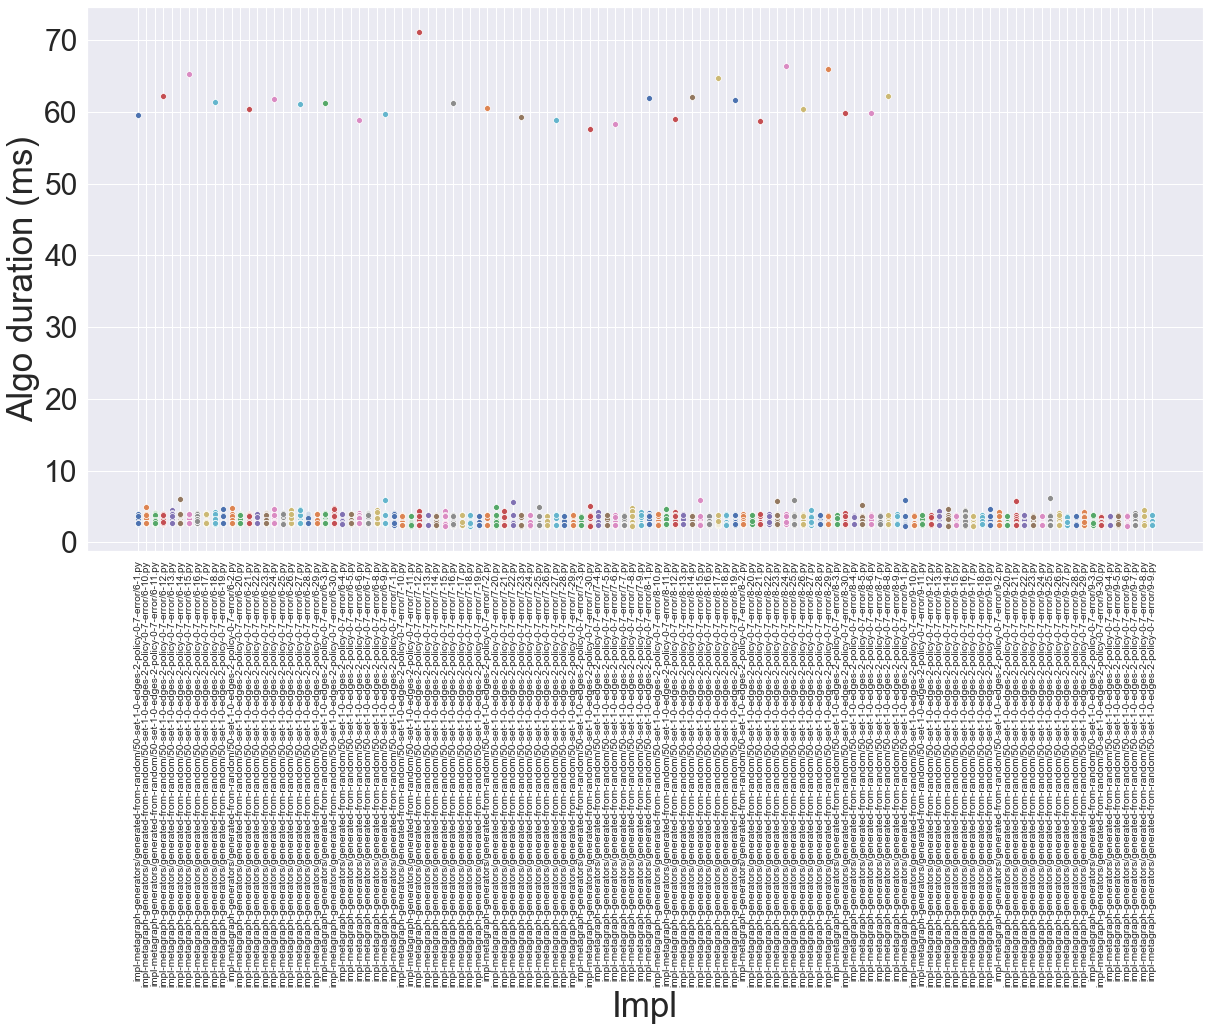

In [29]:
# Scatter plot
for impl_df in impl_name_df_list:
    sns.scatterplot(data=impl_df, x="impl_name", y="comp_cum_time")
    plt.xticks(fontsize=10, rotation=90)
    plt.yticks(fontsize=30)
    plt.xlabel("Impl", fontsize=35)
    plt.ylabel("Algo duration (ms)", fontsize=35)

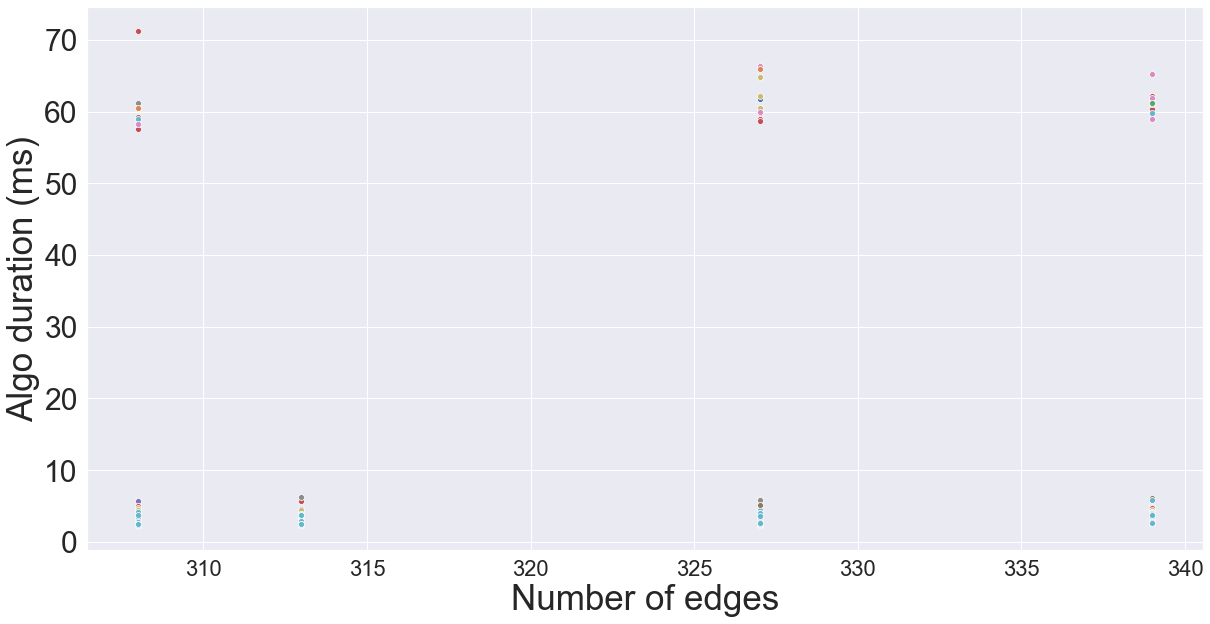

In [22]:
# Scatter plot
for impl_df in impl_name_df_list:
    sns.scatterplot(data=impl_df, x="edge_number", y="comp_cum_time")
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=30)
    plt.xlabel("Number of edges", fontsize=35)
    plt.ylabel("Algo duration (ms)", fontsize=35)